In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# cc = pd.read_csv("C:/Users/User/Documents/Work/Data/call_330/call_center_detail.csv", index_col=0)
cc = pd.read_csv("C:/Users/Stephen/Google Drive/Dataq/my_datasets/call_center_detail.csv"
                 ,encoding='Latin-1', index_col=0)



In [2]:
# change snakecase for column

cc.columns = cc.columns.str.lower()
cc.columns = cc.columns.str.replace(' ', '_')
cc.index.name = 'index'
# cc['agent_name'] = cc['agent_name'].str.strip()
cc.tail()

,call_center_name,call_start_time,call_answer_time,call_end_time,agent_name,agent_number/extension,skill_level,callers_number,policy_applied,call_result,wait_time,transfer_number,number_of_bounces,bounced_transfer_number,talk_time,hold_time,wrap_up_time,agent_transfer_number,disposition_codes
index,,,,,,,,,,,,,,,,,,,
5123,Signet,"03/30/2019, 11:45:39 AM","03/30/2019, 11:45:51 AM","03/30/2019, 11:46:37 AM","Choi, Michael",+19732641284(ext 800),NaN,7738754295,NaN,Answered,0:00:05,NaN,0.0,NaN,0:00:46,0:00:00,0:00:00,NaN,NaN
5124,Signet,"03/30/2019, 12:44:24 PM","03/30/2019, 12:44:32 PM","03/30/2019, 12:48:57 PM","Choi, Michael",+19732641284(ext 800),NaN,7738754295,NaN,Answered,0:00:05,NaN,0.0,NaN,0:04:25,0:00:00,0:00:00,NaN,NaN
5125,Signet,"03/30/2019, 01:27:18 PM","03/30/2019, 01:27:33 PM","03/30/2019, 01:32:46 PM","Choi, Michael",+19732641284(ext 800),NaN,7738754295,NaN,Answered,0:00:05,NaN,0.0,NaN,0:05:13,0:00:00,0:00:00,NaN,NaN
5126,Signet,"03/30/2019, 01:51:30 PM","03/30/2019, 01:51:45 PM","03/30/2019, 01:55:01 PM","Choi, Michael",+19732641284(ext 800),NaN,7738754295,NaN,Answered,0:00:05,NaN,0.0,NaN,0:03:16,0:00:00,0:00:00,NaN,NaN
5127,Signet,"03/30/2019, 02:17:44 PM","03/30/2019, 02:17:56 PM","03/30/2019, 02:26:47 PM","Choi, Michael",+19732641284(ext 800),NaN,7738754295,NaN,Answered,0:00:05,NaN,0.0,NaN,0:08:51,0:00:00,0:00:00,NaN,NaN


In [3]:


agent_names = {'Ramos, Jessica':'jessica', 'Anderson, Rachel':'rachel',
               'Byerly, Stephani':'stephani', 'PH, HATWO':'belle', 'Choi, Michael':'michael'}
# agent_names = {'Choi, Micheal':'micheal', 'Anderson, Rachel':'rachel'}
client_names = {'Agostino':'agostino', 'Crosley':'crosley', 'DaewooDAE':'daewoo_dae', 
                'DaewooASC':'daewoo_asc', 'Home Easy':'home_easy', 'Klasse':'klasse', 
               'Shinco':'shinco', 'Signet':'signet', 'Hyundai Mobile':'hyundai_mobile', 'Midea':'midea', 
               'Winia DimChae':'dimchae' }

cc.rename(index=client_names, inplace=True)
cc['agent_name'] = cc['agent_name'].map(agent_names)

# cc['agent_name'] = cc['agent_name'].map(agent_names)
cc['call_start_month'] = cc['call_start_time'].str[:2]
cc['call_start_day'] = cc['call_start_time'].str[3:5]
cc['call_start_hour'] = cc['call_start_time'].str[11:14]



cc.tail(30)

,call_center_name,call_start_time,call_answer_time,call_end_time,agent_name,agent_number/extension,skill_level,callers_number,policy_applied,call_result,...,number_of_bounces,bounced_transfer_number,talk_time,hold_time,wrap_up_time,agent_transfer_number,disposition_codes,call_start_month,call_start_day,call_start_hour
index,,,,,,,,,,,,,,,,,,,,,
5098,Crosley,"03/29/2019, 03:06:43 PM",NaN,"03/29/2019, 03:07:45 PM",NaN,NaN,NaN,7632750215,NaN,Escaped,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,03,29,03
5099,Hyundai Mobile,"03/29/2019, 03:10:58 PM","03/29/2019, 03:11:11 PM","03/29/2019, 03:14:08 PM",belle,+19739754739(ext 900),NaN,9078682528,NaN,Answered,...,0.0,NaN,0:02:57,0:00:00,0:00:00,NaN,NaN,03,29,03
5100,DaewooDAE,"03/29/2019, 03:15:15 PM","03/29/2019, 03:15:54 PM","03/29/2019, 03:15:54 PM",jessica,+19732641277(ext 300),NaN,9414230716,NaN,Answered,...,0.0,NaN,0:00:00,0:00:00,0:00:00,NaN,NaN,03,29,03
5101,Home Easy,"03/29/2019, 03:22:05 PM","03/29/2019, 03:22:15 PM","03/29/2019, 03:24:17 PM",rachel,+19732641282(ext 600),NaN,7203237854,NaN,Answered,...,0.0,NaN,0:02:02,0:00:00,0:00:00,NaN,NaN,03,29,03
5102,Hyundai Mobile,"03/29/2019, 03:31:18 PM","03/29/2019, 03:31:31 PM","03/29/2019, 03:52:46 PM",belle,+19739754739(ext 900),NaN,9078682528,NaN,Answered,...,0.0,NaN,0:04:37,0:16:38,0:00:00,NaN,NaN,03,29,03
5103,DaewooASC,"03/29/2019, 03:31:35 PM","03/29/2019, 03:31:57 PM","03/29/2019, 03:32:29 PM",jessica,+19732641277(ext 300),NaN,3527890287,NaN,Answered,...,0.0,NaN,0:00:32,0:00:00,0:00:00,NaN,NaN,03,29,03
5104,DaewooDAE,"03/29/2019, 03:32:53 PM","03/29/2019, 03:33:09 PM","03/29/2019, 03:37:06 PM",rachel,+19732641282(ext 600),NaN,6177335882,NaN,Answered,...,0.0,NaN,0:01:51,0:02:07,0:00:00,NaN,NaN,03,29,03
5105,DaewooDAE,"03/29/2019, 03:35:23 PM","03/29/2019, 03:35:34 PM","03/29/2019, 03:36:44 PM",jessica,+19732641277(ext 300),NaN,8012441931,NaN,Answered,...,0.0,NaN,0:01:09,0:00:00,0:00:00,NaN,NaN,03,29,03
5106,Signet,"03/29/2019, 03:41:19 PM","03/29/2019, 03:41:34 PM","03/29/2019, 03:42:08 PM",michael,+19732641284(ext 800),NaN,7144785218,NaN,Answered,...,0.0,NaN,0:00:35,0:00:00,0:01:00,NaN,NaN,03,29,03


`groupby` `agent_name` and then select `micheal`

In [4]:
# string to int
#df.ID = pd.to_numeric(df.ID, errors='coerce')
cc['call_start_month'] = pd.to_numeric(cc['call_start_month'], errors='coerce')
cc['call_start_day'] = pd.to_numeric(cc['call_start_day'], errors='coerce')
cc['call_start_hour'] = pd.to_numeric(cc['call_start_hour'], errors='coerce')

cc.info()
# signet_month = cc.pivot_table(values='call_center_name', index='call_start_month')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127 entries, 1 to 5127
Data columns (total 22 columns):
call_center_name           5127 non-null object
call_start_time            5127 non-null object
call_answer_time           4482 non-null object
call_end_time              5127 non-null object
agent_name                 3364 non-null object
agent_number/extension     4482 non-null object
skill_level                0 non-null float64
callers_number             5127 non-null object
policy_applied             114 non-null object
call_result                5013 non-null object
wait_time                  5013 non-null object
transfer_number            0 non-null float64
number_of_bounces          5013 non-null float64
bounced_transfer_number    0 non-null float64
talk_time                  4482 non-null object
hold_time                  4482 non-null object
wrap_up_time               4482 non-null object
agent_transfer_number      0 non-null float64
disposition_codes          0 non-null

In [5]:
test = cc['agent_name'].str.contains('michael')
test1 = cc['call_start_month'] == 3
test3 = cc[test & test1]

`groupby.size()` returns a series and contains just one value. each value represents the number of rows in each group

In [6]:
print(test3)

      call_center_name          call_start_time         call_answer_time  \
index                                                                      
3314            Signet  03/01/2019, 09:39:47 AM  03/01/2019, 09:40:11 AM   
4217            Signet  03/15/2019, 10:33:46 AM  03/15/2019, 10:34:00 AM   
4234            Signet  03/15/2019, 11:58:15 AM  03/15/2019, 11:58:31 AM   
4236            Signet  03/15/2019, 12:00:07 PM  03/15/2019, 12:00:16 PM   
4242            Signet  03/15/2019, 12:25:57 PM  03/15/2019, 12:26:13 PM   
4252            Signet  03/15/2019, 01:51:23 PM  03/15/2019, 01:51:37 PM   
4331            Signet  03/18/2019, 12:56:56 PM  03/18/2019, 12:57:19 PM   
4435            Signet  03/19/2019, 02:52:28 PM  03/19/2019, 02:52:38 PM   
4471            Signet  03/20/2019, 11:27:54 AM  03/20/2019, 11:28:18 AM   
4481            Signet  03/20/2019, 12:37:41 PM  03/20/2019, 12:37:57 PM   
4521            Signet  03/20/2019, 05:12:21 PM  03/20/2019, 05:12:50 PM   
4550        

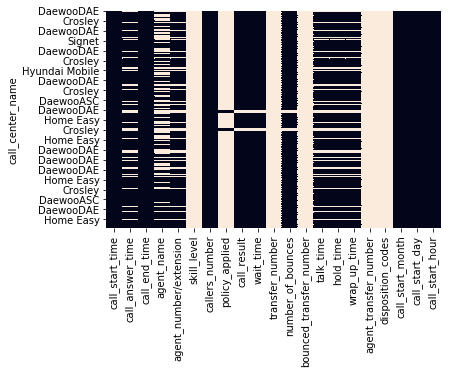

In [10]:
import seaborn as sns
cc_heatmap = cc.set_index('call_center_name')
sns.heatmap(cc_heatmap.isnull(),  cbar=False )